# OpenCV 简介

`OpenCV` 是一个开源的计算机视觉库，1999年由英特尔的 [Gary Bradski](https://en.wikipedia.org/wiki/Gary_Bradski) 启动。

`OpenCV` 库由 C 和 C++ 语言编写，涵盖计算机视觉各个领域内的500多个函数，可以在多种操作系统上运行。它旨在提供一个简洁而又高效的接口，从而帮助开发人员快速地构建视觉应用。

这里主要介绍 [opencv-python](https://github.com/opencv/opencv-python) 类库的使用，基于 [OpenCV-Python Tutorials](https://docs.opencv.org/4.7.0/d6/d00/tutorial_py_root.html) v[4.7.0](https://docs.opencv.org/4.7.0/)

官网概览见 <https://docs.opencv.org/4.7.0/d0/de3/tutorial_py_intro.html>

## 图像处理基本操作

API Doc: [cv Namespace Reference](https://docs.opencv.org/4.7.0/d2/d75/namespacecv.html)

[Basic Operations on Images](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)

1. 加载图像 `cv2.imread` [Getting Started with Images](https://docs.opencv.org/4.7.0/db/deb/tutorial_display_image.html)
2. 显示图像 `cv2.imshow` and `matplotlib`
3. 创建图像 [Drawing Functions in OpenCV](https://docs.opencv.org/4.7.0/dc/da5/tutorial_py_drawing_functions.html)

In [1]:
# 一些初始化工作
import time
t0 = time.time()
import cv2
print(f"load opencv lib used {(time.time() - t0):.2f}s")

# https://github.com/opencv/opencv/tree/4.x/samples/data
# cv2.samples.addSamplesDataSearchPath("./images")
picture_file = cv2.samples.findFile("images/starry_night.jpg")
print(f"locate starry_night.jpg: {picture_file}")

import numpy as np

load opencv lib used 0.22s
locate starry_night.jpg: images/starry_night.jpg


### 1. 使用 cv2.imread 加载图像数据

API [imread()](https://docs.opencv.org/4.7.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

`cv.imread(	filename[, flags] ) -> retval

```
Parameters
* filename	Name of file to be loaded.
* flags	Flag that can take values of cv::ImreadModes, 默认为 IMREAD_COLOR		


enum  	ImreadModes {
  IMREAD_UNCHANGED = -1,
  IMREAD_GRAYSCALE = 0,
  IMREAD_COLOR = 1,
  IMREAD_ANYDEPTH = 2,
  IMREAD_ANYCOLOR = 4,
  IMREAD_LOAD_GDAL = 8,
  IMREAD_REDUCED_GRAYSCALE_2 = 16,
  IMREAD_REDUCED_COLOR_2 = 17,
  IMREAD_REDUCED_GRAYSCALE_4 = 32,
  IMREAD_REDUCED_COLOR_4 = 33,
  IMREAD_REDUCED_GRAYSCALE_8 = 64,
  IMREAD_REDUCED_COLOR_8 = 65,
  IMREAD_IGNORE_ORIENTATION = 128
}
```


更多示例
* <https://github.com/spmallick/learnopencv/blob/master/imread/imread_examples.py>


In [2]:
origin = cv2.imread(picture_file, cv2.IMREAD_UNCHANGED)
print(f"load origin image: shape={origin.shape}, size={origin.size}, dtype={origin.dtype}")

color = cv2.imread(picture_file) # IMREAD_COLOR
print(f"load color image: shape={color.shape}, size={color.size}, dtype={color.dtype}")

gray = cv2.imread(picture_file, cv2.IMREAD_GRAYSCALE)
print(f"load gray image: shape={gray.shape}, size={gray.size}, dtype={gray.dtype}")

load origin image: shape=(600, 752, 3), size=1353600, dtype=uint8
load color image: shape=(600, 752, 3), size=1353600, dtype=uint8
load gray image: shape=(600, 752), size=451200, dtype=uint8


### 2. 显示图像

1. `cv2.imshow`
2. matplotlib 单张图像
3. matplotlib 多张图像

API [imshow()](https://docs.opencv.org/4.7.0/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563)

`cv.imshow( winname, mat ) -> None`

```

```

API [waitKey()](https://docs.opencv.org/4.7.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7)

`cv.waitKey( [, delay] ) -> retval`

```
Parameters
    delay	Delay in milliseconds. 0 is the special value that means "forever".

```


API [destroyAllWindows()](https://docs.opencv.org/4.7.0/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481)

`cv.destroyAllWindows( ) -> None`

In [3]:
# # Python process don't quit
# cv2.imshow("starry night", origin)
# cv2.waitKey()
# cv2.destroyAllWindows()

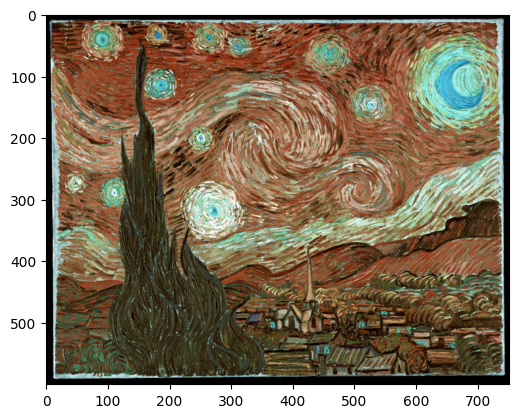

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(origin)
# plt.show()

Text(0.5, 1.0, 'Gray')

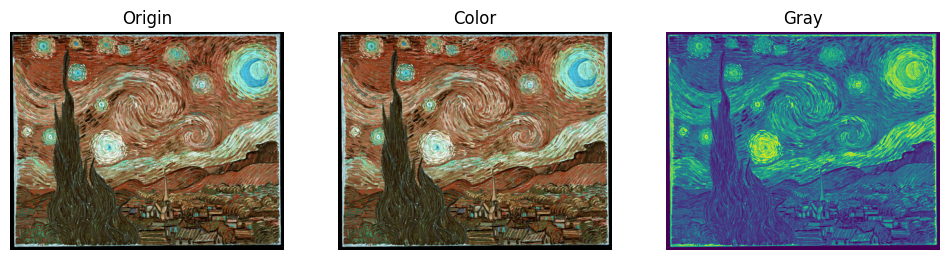

In [5]:
# https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

# create figure size: width * height
fig = plt.figure(figsize=(12, 4))
rows, columns = 1, 3
# Adds a subplot (rows, columns) at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(origin)
plt.axis('off')
plt.title("Origin")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(color)
plt.axis('off')
plt.title("Color")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(gray)
plt.axis('off')
plt.title("Gray")


### 3. 创建图像

[Drawing Functions in OpenCV](https://docs.opencv.org/4.7.0/dc/da5/tutorial_py_drawing_functions.html)

[Image Processing](https://docs.opencv.org/4.7.0/d7/dbd/group__imgproc.html)

API [line()](https://docs.opencv.org/4.7.0/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2)

```
void cv::line ( InputOutputArray img,
	Point 	pt1,
	Point 	pt2,
	const 	Scalar & color,
	int 	thickness = 1,
	int 	lineType = LINE_8,
	int 	shift = 0 
)
```

Python:
`cv.line( img, pt1, pt2, color[, thickness[, lineType[, shift]]] ) -> img`



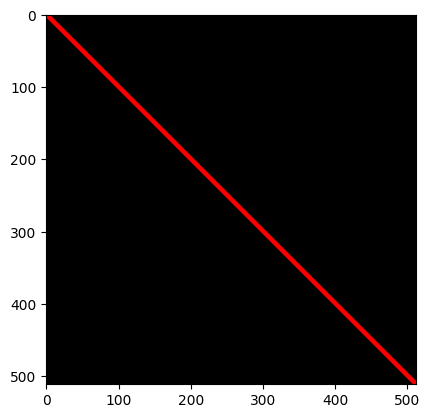

In [6]:
# Drawing Line

# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
line = cv2.line(img,(0,0),(511,511),(255,0,0),5)
plt.imshow(line)

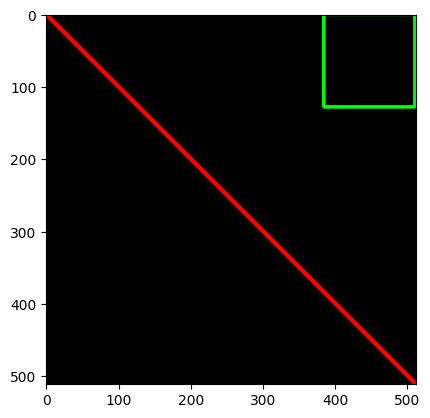

In [7]:
# Drawing Rectangle
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
# Show Image
plt.imshow(img)

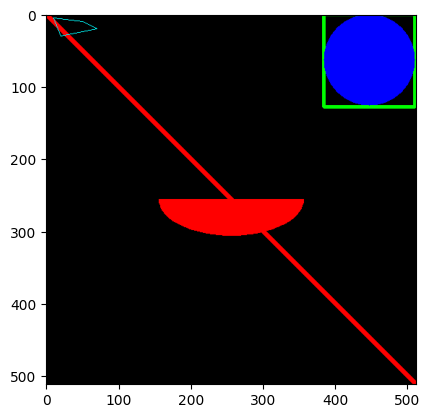

In [8]:
# Drawing Circle
cv2.circle(img,(447,63), 63, (0,0,255), -1)
# Drawing Ellipse
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
# Show Image
plt.imshow(img)

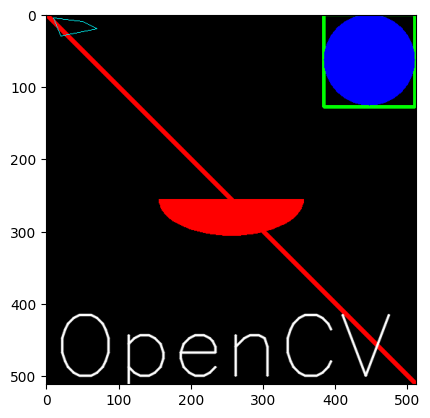

In [9]:
# Adding Text to Images
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
# Show Image
plt.imshow(img)